In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from scipy import stats
import numpy as np

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
data2 = pd.read_excel('MLdata.xlsx')

In [5]:
df = data2.drop('PdM',axis=1)
df['calcination temperature(K)']=df['calcination temperature(K)'].fillna(df['calcination temperature(K)'].mean())
df['calcination time(h)']=df['calcination time(h)'].fillna(df['calcination time(h)'].mean())
df['H2 reduction temperature']=df['H2 reduction temperature'].fillna(df['H2 reduction temperature'].mean())
df['H2 reduction time']=df['H2 reduction time'].fillna(df['H2 reduction time'].mean())
df['catalyst amount(mg)']=df['catalyst amount(mg)'].fillna(df['catalyst amount(mg)'].mean())
df['reaction temperature(K)']=df['reaction temperature(K)'].fillna(df['reaction temperature(K)'].mean())
df['Pd loading']=df['Pd loading'].fillna(df['Pd loading'].mean())


In [6]:
df = df.dropna(axis=0)

In [7]:
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
def huafen(X,Y):
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = huafen(X,Y)

(307, 70) (307,)
(77, 70) (77,)


In [9]:
def traing_process_rmse(clf, tuned_parameters, X_train, y_train):
    #scores = ['neg_mean_absolute_percentage_error','neg_mean_squared_error','neg_mean_absolute_error']
    scores = ['neg_root_mean_squared_error']
    
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(clf,
                           tuned_parameters,
                           cv=5,
                           scoring='%s' % score,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print(clf.best_score_)
        
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        means_train = clf.cv_results_['mean_train_score']
        stds_train = clf.cv_results_['std_train_score']

        for mean, std, mean_train, std_train, params in zip(
                means, stds, means_train, stds_train,
                clf.cv_results_['params']):
            print("train：%0.3f (+/-%0.03f) test：%0.3f (+/-%0.03f)for %r" %
                  (mean, std * 2, mean_train, std_train*2, params))
            
    y_pred = clf.predict(X_test)
    y_trainpred = clf.predict(X_train)
    
    
    return y_trainpred,y_pred,means_train,means

In [10]:
def traing_process_r2(clf, tuned_parameters, X_train, y_train):
    scores = ['r2']
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(clf,
                           tuned_parameters,
                           cv=5,
                           scoring='%s' % score,
                           
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print(clf.best_score_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        means_train = clf.cv_results_['mean_train_score']
        stds_train = clf.cv_results_['std_train_score']

        for mean, std, mean_train, std_train, params in zip(
                means, stds, means_train, stds_train,
                clf.cv_results_['params']):
            print("train：%0.3f (+/-%0.03f) test：%0.3f (+/-%0.03f)for %r" %
                  (mean, std * 2, mean_train, std_train, params))
    y_pred = clf.predict(X_test)
    y_trainpred = clf.predict(X_train)
    
    return y_trainpred,y_pred,means_train,means,clf
   
 

# RF

In [11]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(random_state=8,n_jobs=-1)

# Set the parameters by cross-validation

tuned_parameters = {
                    'n_estimators': [5,10,20,50, 100, 200]
                    # ,'criterion': ['gini', 'entropy']
                     ,'max_depth': [2, 5,7]
 #                   ,'max_features': ['log2', 'sqrt', 'int']
#                     ,'bootstrap': [True, False]
#                    rf_pred ,'warm_start': [True, False]
                    }
rftrain_pred,rf_pred,rftrain_rmse,rftest_rmse = traing_process_rmse(clf,tuned_parameters,X_train,y_train)

# Tuning hyper-parameters for neg_root_mean_squared_error

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters set found on development set:

{'max_depth': 7, 'n_estimators': 20}
-0.18695128136063255

Grid scores on development set:

train：-0.243 (+/-0.061) test：-0.237 (+/-0.012)for {'max_depth': 2, 'n_estimators': 5}
train：-0.244 (+/-0.062) test：-0.235 (+/-0.010)for {'max_depth': 2, 'n_estimators': 10}
train：-0.242 (+/-0.057) test：-0.233 (+/-0.013)for {'max_depth': 2, 'n_estimators': 20}
train：-0.242 (+/-0.059) test：-0.233 (+/-0.014)for {'max_depth': 2, 'n_estimators': 50}
train：-0.242 (+/-0.060) test：-0.233 (+/-0.013)for {'max_depth': 2, 'n_estimators': 100}
train：-0.242 (+/-0.060) test：-0.233 (+/-0.012)for {'max_depth': 2, 'n_estimators': 200}
train：-0.204 (+/-0.062) test：-0.155 (+/-0.016)for {'max_depth': 5, 'n_estimators': 5}
train：-0.195 (+/-0.064) test：-0.149 (+/-0.017)for {'max_depth': 5, 'n_estimators': 10}
train：-0.191 (+/-0.066) test：-0.145 (+/-0.016

In [12]:
_,_,rftrain_r2,rftest_r2,model_rf = traing_process_r2(clf,tuned_parameters,X_train,y_train)

# Tuning hyper-parameters for r2

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters set found on development set:

{'max_depth': 7, 'n_estimators': 50}
0.7015674751774927

Grid scores on development set:

train：0.505 (+/-0.245) test：0.555 (+/-0.019)for {'max_depth': 2, 'n_estimators': 5}
train：0.504 (+/-0.247) test：0.560 (+/-0.015)for {'max_depth': 2, 'n_estimators': 10}
train：0.514 (+/-0.217) test：0.567 (+/-0.021)for {'max_depth': 2, 'n_estimators': 20}
train：0.511 (+/-0.228) test：0.568 (+/-0.022)for {'max_depth': 2, 'n_estimators': 50}
train：0.511 (+/-0.230) test：0.568 (+/-0.021)for {'max_depth': 2, 'n_estimators': 100}
train：0.511 (+/-0.232) test：0.568 (+/-0.020)for {'max_depth': 2, 'n_estimators': 200}
train：0.649 (+/-0.205) test：0.808 (+/-0.020)for {'max_depth': 5, 'n_estimators': 5}
train：0.681 (+/-0.197) test：0.823 (+/-0.021)for {'max_depth': 5, 'n_estimators': 10}
train：0.692 (+/-0.198) test：0.833 (+/-0.019)for {'max_depth': 5, 'n_estimators': 20}
tra

# XGboost

In [13]:

import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]



In [14]:
import xgboost as xgb
param_test1 =  {'learning_rate': [0.01,0.1,0.2,0.25,0.5,0.6,1,2],
              'n_estimators': [10,15,20,25,30,40,100],
              'max_depth': [2,3,4,5,6,7,8]
              
   }#25课树差不多0.741

model = xgb.sklearn.XGBRegressor()
xgbtrain_pred,xgb_pred,xgbtrain_rmse,xgbtest_rmse= traing_process_rmse(model,param_test1,X_train,y_train)

# Tuning hyper-parameters for neg_root_mean_squared_error

Fitting 5 folds for each of 392 candidates, totalling 1960 fits
Best parameters set found on development set:

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}
-0.17364244014293148

Grid scores on development set:

train：-0.338 (+/-0.023) test：-0.338 (+/-0.005)for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 10}
train：-0.331 (+/-0.024) test：-0.330 (+/-0.006)for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 15}
train：-0.324 (+/-0.025) test：-0.323 (+/-0.006)for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 20}
train：-0.318 (+/-0.026) test：-0.316 (+/-0.006)for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 25}
train：-0.312 (+/-0.026) test：-0.310 (+/-0.007)for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 30}
train：-0.301 (+/-0.028) test：-0.299 (+/-0.007)for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 40}
train：-0.262 (+/-0.038) test：-0.254 (+/-0.010)for {'lea

ValueError: feature_names mismatch: ['calcination temperature(K)', 'calcination time(h)', 'H2 reduction temperature', 'H2 reduction time', 'catalyst amount(mg)', 'reaction temperature(K)', 'Pd loading', 'aerosolsynthesis', 'amorphouscitrate', 'electrolessplating', 'impregnation', 'one-pothydrothermal', 'precipitation', 'Co(NO3)3', 'Ga(NO3)3', 'H2PdCl6', 'H_PdCl4_', 'In(OH)3', 'La(NO3)3', 'Mg(NO3)2', 'Pd(C5H7O2)2', 'Pd(NO3)2', 'Pd(O2CCH3)2', 'PdCl2', 'Pd(OH)2', 'RuNO(NO3)3', 'Y(NO3)3', 'Zn(NO3)2', 'ZnCl2', 'Zr(NO3)3', 'metalsalts', 'Zn(C5H7O2)2', 'Zn(NO3)2(Na2CO3)', 'Zn(NO3)2(NH3)', 'Ce(NO3)3(Na2CO3)', 'Al(NO3)3', 'Zr(OH)4', 'HCl', 'precursor_nan', '(ZrO2)x(Al2O3)y', 'A.C.', 'Al2O3', 'FeCrAl', 'CeO2', 'Ceria', 'Ga2O3', 'HfO2', 'In2O3', 'MCM-41', 'MgO', 'Nb2O5', 'Pr6O11', 'SBA-15', 'SiO2', 'Ta2O5', 'TiO2', 'Zn1Zr1OX', 'ZnO', 'ZnO-A', 'ZnO-B', 'ZnO2–CeO2', 'ZrO2', 'ZrO2–TiO2', 'carbonblack', 'm-ZnO', 'quartzsand', 'α-Ga2O3', 'β-Ga2O3', 'γ-Ga2O3', 'support_nan'] ['calcination temperature(K)', 'calcination time(h)', 'H2 reduction temperature', 'H2 reduction time', 'catalyst amount(mg)', 'reaction temperature(K)', 'Pd loading', 'aerosolsynthesis', 'amorphouscitrate', 'electrolessplating', 'impregnation', 'one-pothydrothermal', 'precipitation', 'Co(NO3)3', 'Ga(NO3)3', 'H2PdCl6', 'H[PdCl4]', 'In(OH)3', 'La(NO3)3', 'Mg(NO3)2', 'Pd(C5H7O2)2', 'Pd(NO3)2', 'Pd(O2CCH3)2', 'PdCl2', 'Pd(OH)2', 'RuNO(NO3)3', 'Y(NO3)3', 'Zn(NO3)2', 'ZnCl2', 'Zr(NO3)3', 'metalsalts', 'Zn(C5H7O2)2', 'Zn(NO3)2(Na2CO3)', 'Zn(NO3)2(NH3)', 'Ce(NO3)3(Na2CO3)', 'Al(NO3)3', 'Zr(OH)4', 'HCl', 'precursor_nan', '(ZrO2)x(Al2O3)y', 'A.C.', 'Al2O3', 'FeCrAl', 'CeO2', 'Ceria', 'Ga2O3', 'HfO2', 'In2O3', 'MCM-41', 'MgO', 'Nb2O5', 'Pr6O11', 'SBA-15', 'SiO2', 'Ta2O5', 'TiO2', 'Zn1Zr1OX', 'ZnO', 'ZnO-A', 'ZnO-B', 'ZnO2–CeO2', 'ZrO2', 'ZrO2–TiO2', 'carbonblack', 'm-ZnO', 'quartzsand', 'α-Ga2O3', 'β-Ga2O3', 'γ-Ga2O3', 'support_nan']
expected H_PdCl4_ in input data
training data did not have the following fields: H[PdCl4]

In [15]:
_,_,xbgtrain_r2,xbgtest_r2,model_xgb= traing_process_r2(model,param_test1,X_train,y_train)

# Tuning hyper-parameters for r2

Fitting 5 folds for each of 392 candidates, totalling 1960 fits
Best parameters set found on development set:

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}
0.7463913877381276

Grid scores on development set:

train：0.058 (+/-0.101) test：0.092 (+/-0.005)for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 10}
train：0.099 (+/-0.104) test：0.133 (+/-0.006)for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 15}
train：0.136 (+/-0.107) test：0.170 (+/-0.008)for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 20}
train：0.169 (+/-0.110) test：0.204 (+/-0.009)for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 25}
train：0.200 (+/-0.113) test：0.235 (+/-0.010)for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 30}
train：0.252 (+/-0.119) test：0.290 (+/-0.011)for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 40}
train：0.434 (+/-0.152) test：0.487 (+/-0.017)for {'learning_rate': 0.01, 'max_depth': 2, 'n_est

ValueError: feature_names mismatch: ['calcination temperature(K)', 'calcination time(h)', 'H2 reduction temperature', 'H2 reduction time', 'catalyst amount(mg)', 'reaction temperature(K)', 'Pd loading', 'aerosolsynthesis', 'amorphouscitrate', 'electrolessplating', 'impregnation', 'one-pothydrothermal', 'precipitation', 'Co(NO3)3', 'Ga(NO3)3', 'H2PdCl6', 'H_PdCl4_', 'In(OH)3', 'La(NO3)3', 'Mg(NO3)2', 'Pd(C5H7O2)2', 'Pd(NO3)2', 'Pd(O2CCH3)2', 'PdCl2', 'Pd(OH)2', 'RuNO(NO3)3', 'Y(NO3)3', 'Zn(NO3)2', 'ZnCl2', 'Zr(NO3)3', 'metalsalts', 'Zn(C5H7O2)2', 'Zn(NO3)2(Na2CO3)', 'Zn(NO3)2(NH3)', 'Ce(NO3)3(Na2CO3)', 'Al(NO3)3', 'Zr(OH)4', 'HCl', 'precursor_nan', '(ZrO2)x(Al2O3)y', 'A.C.', 'Al2O3', 'FeCrAl', 'CeO2', 'Ceria', 'Ga2O3', 'HfO2', 'In2O3', 'MCM-41', 'MgO', 'Nb2O5', 'Pr6O11', 'SBA-15', 'SiO2', 'Ta2O5', 'TiO2', 'Zn1Zr1OX', 'ZnO', 'ZnO-A', 'ZnO-B', 'ZnO2–CeO2', 'ZrO2', 'ZrO2–TiO2', 'carbonblack', 'm-ZnO', 'quartzsand', 'α-Ga2O3', 'β-Ga2O3', 'γ-Ga2O3', 'support_nan'] ['calcination temperature(K)', 'calcination time(h)', 'H2 reduction temperature', 'H2 reduction time', 'catalyst amount(mg)', 'reaction temperature(K)', 'Pd loading', 'aerosolsynthesis', 'amorphouscitrate', 'electrolessplating', 'impregnation', 'one-pothydrothermal', 'precipitation', 'Co(NO3)3', 'Ga(NO3)3', 'H2PdCl6', 'H[PdCl4]', 'In(OH)3', 'La(NO3)3', 'Mg(NO3)2', 'Pd(C5H7O2)2', 'Pd(NO3)2', 'Pd(O2CCH3)2', 'PdCl2', 'Pd(OH)2', 'RuNO(NO3)3', 'Y(NO3)3', 'Zn(NO3)2', 'ZnCl2', 'Zr(NO3)3', 'metalsalts', 'Zn(C5H7O2)2', 'Zn(NO3)2(Na2CO3)', 'Zn(NO3)2(NH3)', 'Ce(NO3)3(Na2CO3)', 'Al(NO3)3', 'Zr(OH)4', 'HCl', 'precursor_nan', '(ZrO2)x(Al2O3)y', 'A.C.', 'Al2O3', 'FeCrAl', 'CeO2', 'Ceria', 'Ga2O3', 'HfO2', 'In2O3', 'MCM-41', 'MgO', 'Nb2O5', 'Pr6O11', 'SBA-15', 'SiO2', 'Ta2O5', 'TiO2', 'Zn1Zr1OX', 'ZnO', 'ZnO-A', 'ZnO-B', 'ZnO2–CeO2', 'ZrO2', 'ZrO2–TiO2', 'carbonblack', 'm-ZnO', 'quartzsand', 'α-Ga2O3', 'β-Ga2O3', 'γ-Ga2O3', 'support_nan']
expected H_PdCl4_ in input data
training data did not have the following fields: H[PdCl4]

# ExtraTrees

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
parameters= {'n_estimators':list(range(5,30,2)),'max_depth':list(range(3,10,2)),'min_samples_leaf':list(range(1,6,1))}
extra = ExtraTreesRegressor()
exttrain_pred,ext_pred,exttrain_rmse,exttest_rmse = traing_process_rmse(extra,parameters,X_train,y_train)

# Tuning hyper-parameters for neg_root_mean_squared_error

Fitting 5 folds for each of 260 candidates, totalling 1300 fits
Best parameters set found on development set:

{'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 27}
-0.18631038744779904

Grid scores on development set:

train：-0.267 (+/-0.042) test：-0.252 (+/-0.027)for {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 5}
train：-0.272 (+/-0.033) test：-0.252 (+/-0.018)for {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 7}
train：-0.267 (+/-0.036) test：-0.252 (+/-0.017)for {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 9}
train：-0.269 (+/-0.044) test：-0.252 (+/-0.021)for {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 11}
train：-0.264 (+/-0.030) test：-0.246 (+/-0.021)for {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 13}
train：-0.262 (+/-0.044) test：-0.248 (+/-0.023)for {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 15}
train：-0.258 (+/-0.044) test：-0.247 (+/-0.012)for {'max_de

/home/sun/anaconda3/envs/lsy/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- H[PdCl4]
Feature names seen at fit time, yet now missing:
- H_PdCl4_

  warnings.warn(message, FutureWarning)


In [19]:
_,_,exttrain_r2,exttest_r2,model_ext = traing_process_r2(extra,parameters,X_train,y_train)

# Tuning hyper-parameters for r2

Fitting 5 folds for each of 260 candidates, totalling 1300 fits
Best parameters set found on development set:

{'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 27}
0.6965969623755034

Grid scores on development set:

train：0.408 (+/-0.097) test：0.503 (+/-0.076)for {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 5}
train：0.430 (+/-0.155) test：0.506 (+/-0.043)for {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 7}
train：0.406 (+/-0.140) test：0.501 (+/-0.027)for {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 9}
train：0.423 (+/-0.103) test：0.519 (+/-0.059)for {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 11}
train：0.381 (+/-0.141) test：0.466 (+/-0.058)for {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 13}
train：0.429 (+/-0.129) test：0.519 (+/-0.031)for {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 15}
train：0.443 (+/-0.177) test：0.538 (+/-0.029)for {'max_depth': 3, 'min_samples_leaf': 1, 'n_estima

/home/sun/anaconda3/envs/lsy/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- H[PdCl4]
Feature names seen at fit time, yet now missing:
- H_PdCl4_

  warnings.warn(message, FutureWarning)


# AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostRegressor
parameters_ada = {'learning_rate': [0.01, 0.02,0.03,0.05,0.1, 1,10,20]}
ADA = AdaBoostRegressor()
adatrain_pred,ada_pred,adatrain_rmse,adatest_rmse = traing_process_rmse(ADA,parameters_ada,X_train,y_train)

# Tuning hyper-parameters for neg_root_mean_squared_error

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on development set:

{'learning_rate': 0.1}
-0.21614196179331854

Grid scores on development set:

train：-0.223 (+/-0.073) test：-0.202 (+/-0.016)for {'learning_rate': 0.01}
train：-0.225 (+/-0.074) test：-0.200 (+/-0.013)for {'learning_rate': 0.02}
train：-0.224 (+/-0.070) test：-0.198 (+/-0.016)for {'learning_rate': 0.03}
train：-0.221 (+/-0.065) test：-0.193 (+/-0.016)for {'learning_rate': 0.05}
train：-0.216 (+/-0.060) test：-0.190 (+/-0.013)for {'learning_rate': 0.1}
train：-0.228 (+/-0.048) test：-0.197 (+/-0.016)for {'learning_rate': 1}
train：-0.543 (+/-0.104) test：-0.517 (+/-0.134)for {'learning_rate': 10}
train：-0.496 (+/-0.169) test：-0.529 (+/-0.171)for {'learning_rate': 20}


/home/sun/anaconda3/envs/lsy/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- H[PdCl4]
Feature names seen at fit time, yet now missing:
- H_PdCl4_

  warnings.warn(message, FutureWarning)


In [21]:
_,_,adatrain_r2,adatest_r2,model_ada = traing_process_r2(ADA,parameters_ada,X_train,y_train)

# Tuning hyper-parameters for r2

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on development set:

{'learning_rate': 0.1}
0.6022486323500436

Grid scores on development set:

train：0.578 (+/-0.251) test：0.677 (+/-0.022)for {'learning_rate': 0.01}
train：0.587 (+/-0.244) test：0.686 (+/-0.025)for {'learning_rate': 0.02}
train：0.595 (+/-0.232) test：0.684 (+/-0.024)for {'learning_rate': 0.03}
train：0.588 (+/-0.219) test：0.695 (+/-0.025)for {'learning_rate': 0.05}
train：0.602 (+/-0.215) test：0.713 (+/-0.022)for {'learning_rate': 0.1}
train：0.583 (+/-0.169) test：0.693 (+/-0.024)for {'learning_rate': 1}
train：-1.459 (+/-1.519) test：-0.987 (+/-0.421)for {'learning_rate': 10}
train：-2.036 (+/-1.085) test：-1.714 (+/-0.374)for {'learning_rate': 20}


/home/sun/anaconda3/envs/lsy/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- H[PdCl4]
Feature names seen at fit time, yet now missing:
- H_PdCl4_

  warnings.warn(message, FutureWarning)


# GradientBoostingRegressor

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
#parameters_= {'loss':['ls','lad','huber','quantile'],'n_estimators':list(range(10,30,5)),'max_depth':list(range(3,10,2)),'min_samples_leaf':list(range(1,6,2))}
param_gbr =  {'learning_rate': [0.1,0.25,0.5,0.6],
              'n_estimators': [10,15,20],
              'max_depth': [3,5,7,9]}
GBRT = GradientBoostingRegressor()
gbrtrain_pred,gbr_pred,gbrtrain_rmse,gbrtest_rmse = traing_process_rmse(GBRT,param_gbr,X_train,y_train)

# Tuning hyper-parameters for neg_root_mean_squared_error

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters set found on development set:

{'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 20}
-0.17709632550589335

Grid scores on development set:

train：-0.244 (+/-0.048) test：-0.224 (+/-0.012)for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}
train：-0.224 (+/-0.055) test：-0.198 (+/-0.013)for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 15}
train：-0.213 (+/-0.058) test：-0.183 (+/-0.014)for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}
train：-0.219 (+/-0.046) test：-0.182 (+/-0.010)for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10}
train：-0.201 (+/-0.058) test：-0.149 (+/-0.013)for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 15}
train：-0.193 (+/-0.063) test：-0.132 (+/-0.014)for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 20}
train：-0.216 (+/-0.048) test：-0.156 (+/-0.009)for {'learning_rat

/home/sun/anaconda3/envs/lsy/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- H[PdCl4]
Feature names seen at fit time, yet now missing:
- H_PdCl4_

  warnings.warn(message, FutureWarning)


In [24]:
_,_,gbrtrain_r2,gbrtest_r2,model_gbr = traing_process_r2(GBRT,param_gbr,X_train,y_train)

# Tuning hyper-parameters for r2

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters set found on development set:

{'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 20}
0.7367092364233792

Grid scores on development set:

train：0.506 (+/-0.183) test：0.600 (+/-0.018)for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}
train：0.582 (+/-0.199) test：0.687 (+/-0.018)for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 15}
train：0.619 (+/-0.203) test：0.734 (+/-0.019)for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}
train：0.599 (+/-0.163) test：0.735 (+/-0.014)for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10}
train：0.665 (+/-0.197) test：0.823 (+/-0.015)for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 15}
train：0.684 (+/-0.202) test：0.862 (+/-0.015)for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 20}
train：0.611 (+/-0.174) test：0.807 (+/-0.011)for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 

/home/sun/anaconda3/envs/lsy/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- H[PdCl4]
Feature names seen at fit time, yet now missing:
- H_PdCl4_

  warnings.warn(message, FutureWarning)


# BaggingRegressor

In [27]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor()
parameters_bag= {'n_estimators':list(range(5,50,2))}
bagtrain_pred,bag_pred,bagtrain_rmse,bagtest_rmse = traing_process_rmse(bag,parameters_bag,X_train,y_train)

# Tuning hyper-parameters for neg_root_mean_squared_error

Fitting 5 folds for each of 23 candidates, totalling 115 fits
Best parameters set found on development set:

{'n_estimators': 37}
-0.1851085296035971

Grid scores on development set:

train：-0.202 (+/-0.066) test：-0.112 (+/-0.012)for {'n_estimators': 5}
train：-0.195 (+/-0.060) test：-0.106 (+/-0.012)for {'n_estimators': 7}
train：-0.199 (+/-0.088) test：-0.102 (+/-0.014)for {'n_estimators': 9}
train：-0.192 (+/-0.065) test：-0.101 (+/-0.013)for {'n_estimators': 11}
train：-0.198 (+/-0.062) test：-0.102 (+/-0.014)for {'n_estimators': 13}
train：-0.189 (+/-0.060) test：-0.097 (+/-0.014)for {'n_estimators': 15}
train：-0.192 (+/-0.066) test：-0.096 (+/-0.018)for {'n_estimators': 17}
train：-0.191 (+/-0.069) test：-0.097 (+/-0.014)for {'n_estimators': 19}
train：-0.196 (+/-0.057) test：-0.097 (+/-0.016)for {'n_estimators': 21}
train：-0.194 (+/-0.070) test：-0.098 (+/-0.016)for {'n_estimators': 23}
train：-0.191 (+/-0.066) test：-0.094 (+/-0.012)for 

/home/sun/anaconda3/envs/lsy/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- H[PdCl4]
Feature names seen at fit time, yet now missing:
- H_PdCl4_

  warnings.warn(message, FutureWarning)


In [35]:
_,_,bagtrain_r2,bagtest_r2,model_bag = traing_process_r2(bag,parameters_bag,X_train,y_train)

# Tuning hyper-parameters for r2

Fitting 5 folds for each of 23 candidates, totalling 115 fits
Best parameters set found on development set:

{'n_estimators': 37}
0.7092904337737128

Grid scores on development set:

train：0.636 (+/-0.197) test：0.904 (+/-0.017)for {'n_estimators': 5}
train：0.626 (+/-0.248) test：0.919 (+/-0.008)for {'n_estimators': 7}
train：0.660 (+/-0.267) test：0.916 (+/-0.009)for {'n_estimators': 9}
train：0.667 (+/-0.241) test：0.924 (+/-0.008)for {'n_estimators': 11}
train：0.688 (+/-0.226) test：0.920 (+/-0.013)for {'n_estimators': 13}
train：0.683 (+/-0.271) test：0.927 (+/-0.011)for {'n_estimators': 15}
train：0.676 (+/-0.225) test：0.924 (+/-0.009)for {'n_estimators': 17}
train：0.672 (+/-0.231) test：0.923 (+/-0.013)for {'n_estimators': 19}
train：0.699 (+/-0.235) test：0.925 (+/-0.009)for {'n_estimators': 21}
train：0.678 (+/-0.228) test：0.929 (+/-0.010)for {'n_estimators': 23}
train：0.695 (+/-0.250) test：0.928 (+/-0.011)for {'n_estimators': 25}
train：0.688 (+/-0.239) test

/home/sun/anaconda3/envs/lsy/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- H[PdCl4]
Feature names seen at fit time, yet now missing:
- H_PdCl4_

  warnings.warn(message, FutureWarning)


# SHAP

In [38]:
import shap
import time

In [41]:
model = xgb.sklearn.XGBRegressor(learning_rate=0.5,max_depth=3,n_estimators=100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [45]:
shap_values = shap.TreeExplainer(model).shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


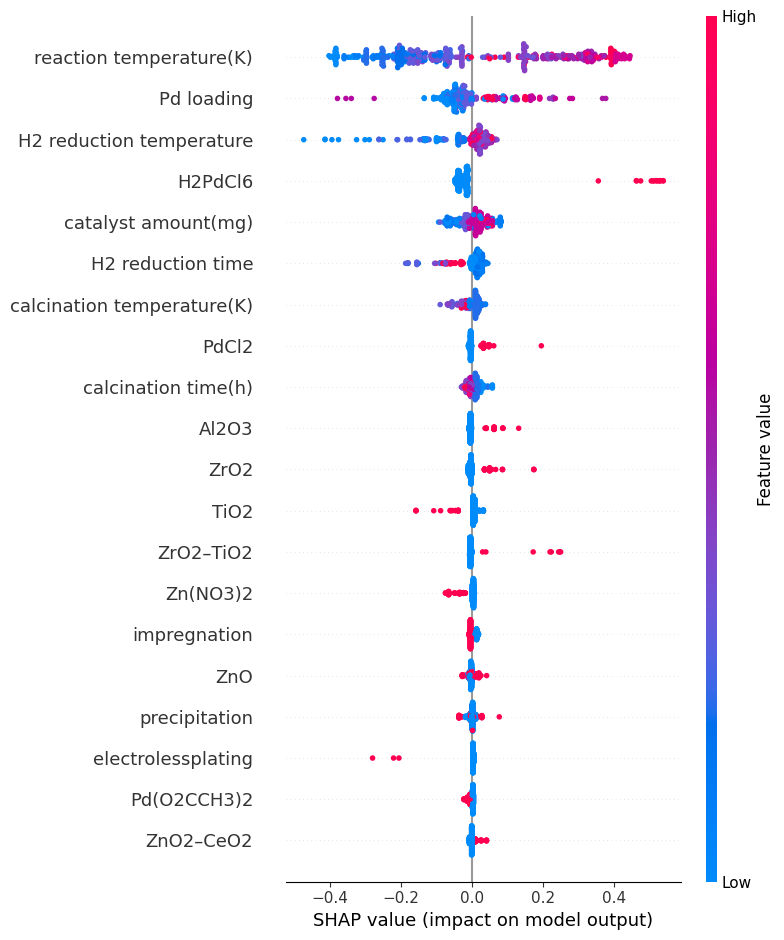

In [47]:
shap.summary_plot(shap_values, X,max_display = 20, show = True)